In [7]:
import math as m
import numpy as np
from numpy import genfromtxt
import os

pos_path = "Movements/Kinect/Positions/m10_s01_positions.txt"
ang_path = "Movements/Kinect/Angles/m10_s01_angles.txt"
pos_data = genfromtxt(pos_path)
ang_data = genfromtxt(ang_path)

pos_data.shape # (num_frames, (x, y, z)*22kps)

(669, 66)

In [2]:
num_frames = pos_data.shape[0]
num_kp = 22
num_axes = 3
p_data = pos_data.T
p_data = p_data.reshape(num_kp, num_axes, -1)
a_data = ang_data.T
a_data = a_data.reshape(num_kp, num_axes, -1)

p = np.copy(p_data)
a = np.copy(a_data)

In [3]:
def Rotx(theta):
    return np.matrix([[ 1, 0           , 0           ],
                      [ 0, m.cos(theta),-m.sin(theta)],
                      [ 0, m.sin(theta), m.cos(theta)]])
  
def Roty(theta):
    return np.matrix([[ m.cos(theta), 0, m.sin(theta)],
                      [ 0           , 1, 0           ],
                      [-m.sin(theta), 0, m.cos(theta)]])
  
def Rotz(theta):
    return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                      [ m.sin(theta), m.cos(theta) , 0 ],
                      [ 0           , 0            , 1 ]])

def eulers_2_rot_matrix(x):
    gamma_x=x[0];beta_y=x[1];alpha_z=x[2];
    return Rotz(alpha_z)*Roty(beta_y)*Rotx(gamma_x)

In [4]:
# convert the data from relative coordinates to absolute coordinates
def rel2abs(p, a, num_frames):
    skel = np.zeros((num_kp, num_axes, num_frames))
    for i in range(num_frames):
        """
        1 Waist (absolute)
        2 Spine
        3 Chest
        4 Neck
        5 Head
        6 Head tip
        7 Left collar
        8 Left upper arm 
        9 Left forearm
        10 Left hand
        11 Right collar
        12 Right upper arm 
        13 Right forearm
        14 Right hand
        15 Left upper leg 
        16 Left lower leg 
        17 Left foot 
        18 Left leg toes
        19 Right upper leg 
        20 Right lower leg 
        21 Right foot
        22 Right leg toes
        """

        joint = p[:,:,i]
        joint_ang = a[:,:,i]

        # chest, neck, head
        rot_1 = eulers_2_rot_matrix(joint_ang[0,:]*np.pi/180);
        joint[1,:] =  rot_1@joint[1,:] + joint[0,:]
        rot_2 = rot_1*eulers_2_rot_matrix(joint_ang[1,:]*np.pi/180)
        joint[2,:] =  rot_2@joint[2,:] +  joint[1,:]
        rot_3 = rot_2*eulers_2_rot_matrix(joint_ang[2,:]*np.pi/180)
        joint[3,:] =  rot_3@joint[3,:] +  joint[2,:]
        rot_4 = rot_3*eulers_2_rot_matrix(joint_ang[3,:]*np.pi/180)
        joint[4,:] =  rot_4@joint[4,:] +  joint[3,:]
        rot_5 = rot_4*eulers_2_rot_matrix(joint_ang[4,:]*np.pi/180)
        joint[5,:] =  rot_5@joint[5,:] +  joint[4,:]

        # left-arm
        rot_6 = eulers_2_rot_matrix(joint_ang[2,:]*np.pi/180)
        joint[6,:] =  rot_6@joint[6,:] +  joint[2,:]
        rot_7 = rot_6*eulers_2_rot_matrix(joint_ang[6,:]*np.pi/180)
        joint[7,:] =  rot_7@joint[7,:] +  joint[6,:]
        rot_8 = rot_7*eulers_2_rot_matrix(joint_ang[7,:]*np.pi/180)
        joint[8,:] = rot_8@joint[8,:] +  joint[7,:]
        rot_9 = rot_8*eulers_2_rot_matrix(joint_ang[8,:]*np.pi/180)
        joint[9,:] = rot_9@joint[9,:] +  joint[8,:]

        # right-arm
        rot_10 = eulers_2_rot_matrix(joint_ang[2,:]*np.pi/180)
        joint[10,:] =  rot_10@joint[10,:] +  joint[2,:]
        rot_11 = rot_10*eulers_2_rot_matrix(joint_ang[10,:]*np.pi/180)
        joint[11,:] =  rot_11@joint[11,:] +  joint[10,:]
        rot_12 = rot_11*eulers_2_rot_matrix(joint_ang[11,:]*np.pi/180)
        joint[12,:] = rot_12@joint[12,:] +  joint[11,:]
        rot_13 = rot_12*eulers_2_rot_matrix(joint_ang[12,:]*np.pi/180)
        joint[13,:] = rot_13@joint[13,:] +  joint[12,:]

        # left-leg
        rot_14 = eulers_2_rot_matrix(joint_ang[0,:]*np.pi/180)
        joint[14,:] =  rot_14@joint[14,:] +  joint[0,:]
        rot_15 = rot_14*eulers_2_rot_matrix(joint_ang[14,:]*np.pi/180)
        joint[15,:] =  rot_15@joint[15,:] +  joint[14,:]
        rot_16 = rot_15*eulers_2_rot_matrix(joint_ang[15,:]*np.pi/180)
        joint[16,:] = rot_16@joint[16,:] +  joint[15,:]
        rot_17 = rot_16*eulers_2_rot_matrix(joint_ang[16,:]*np.pi/180)
        joint[17,:] = rot_17@joint[17,:] +  joint[16,:]

        # right-leg
        rot_18 = eulers_2_rot_matrix(joint_ang[0,:]*np.pi/180)
        joint[18,:] =  rot_18@joint[18,:] +  joint[0,:]
        rot_19 = rot_18*eulers_2_rot_matrix(joint_ang[18,:]*np.pi/180)
        joint[19,:] =  rot_19@joint[19,:] +  joint[18,:]
        rot_20 = rot_19*eulers_2_rot_matrix(joint_ang[19,:]*np.pi/180)
        joint[20,:] = rot_20@joint[20,:] +  joint[19,:]
        rot_21 = rot_20*eulers_2_rot_matrix(joint_ang[20,:]*np.pi/180)
        joint[21,:] = rot_21@joint[21,:] +  joint[20,:]

        skel[:,:,i] = joint
    return skel

In [5]:
skel = rel2abs(p, a, num_frames)

In [24]:
# find maximum and minimum values (for plotting)
a = p_data.transpose(2,0,1).reshape(-1, 3)
max_x = max(a[:, 0]) # 27
min_x = min(a[:, 0]) #-26
max_y = max(a[:, 1])
min_y = min(a[:, 1])
max_z = max(a[:, 2])
min_z = min(a[:, 2])

In [25]:
# order of joint connections
J = np.array([[3, 5, 4, 2, 1, 2, 6, 7, 8, 2, 10, 11, 12, 0, 14, 15, 16, 0, 18, 19, 20],
              [2, 4, 2, 1, 0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]])

In [26]:
# Visualization
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

def get_plot(i):
    ax.cla()
    
    ax.set_title('2D plot using transformed data') 
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    joint = skel[:, :, i]
    
    for j in range(J.shape[1]):
        p1 = joint[J[0,j],:]
        p2 = joint[J[1,j],:]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'o-')

plt.rcParams['animation.html'] = 'html5'
anim = FuncAnimation(fig, get_plot, blit=False, frames=num_frames)
plt.close()

In [27]:
anim

In [11]:
# Visualization 3D 
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection = '3d')

def get_plot(i):
    ax.cla()
    
    ax.set_title('3D plot using transformed data') 
    ax.set_xlabel('z')
    ax.set_ylabel('x')
    ax.set_zlabel('y')
    
    joint = skel[:, :, i]
    
    for j in range(J.shape[1]):
        p1 = joint[J[0,j],:]
        p2 = joint[J[1,j],:]
        ax.plot([p1[2], p2[2]], [p1[0], p2[0]], [p1[1], p2[1]], 'o-')

plt.rcParams['animation.html'] = 'html5'
anim3d = FuncAnimation(fig, get_plot, blit=False, frames=num_frames)
plt.close()

In [12]:
anim3d

<IPython.core.display.Javascript object>


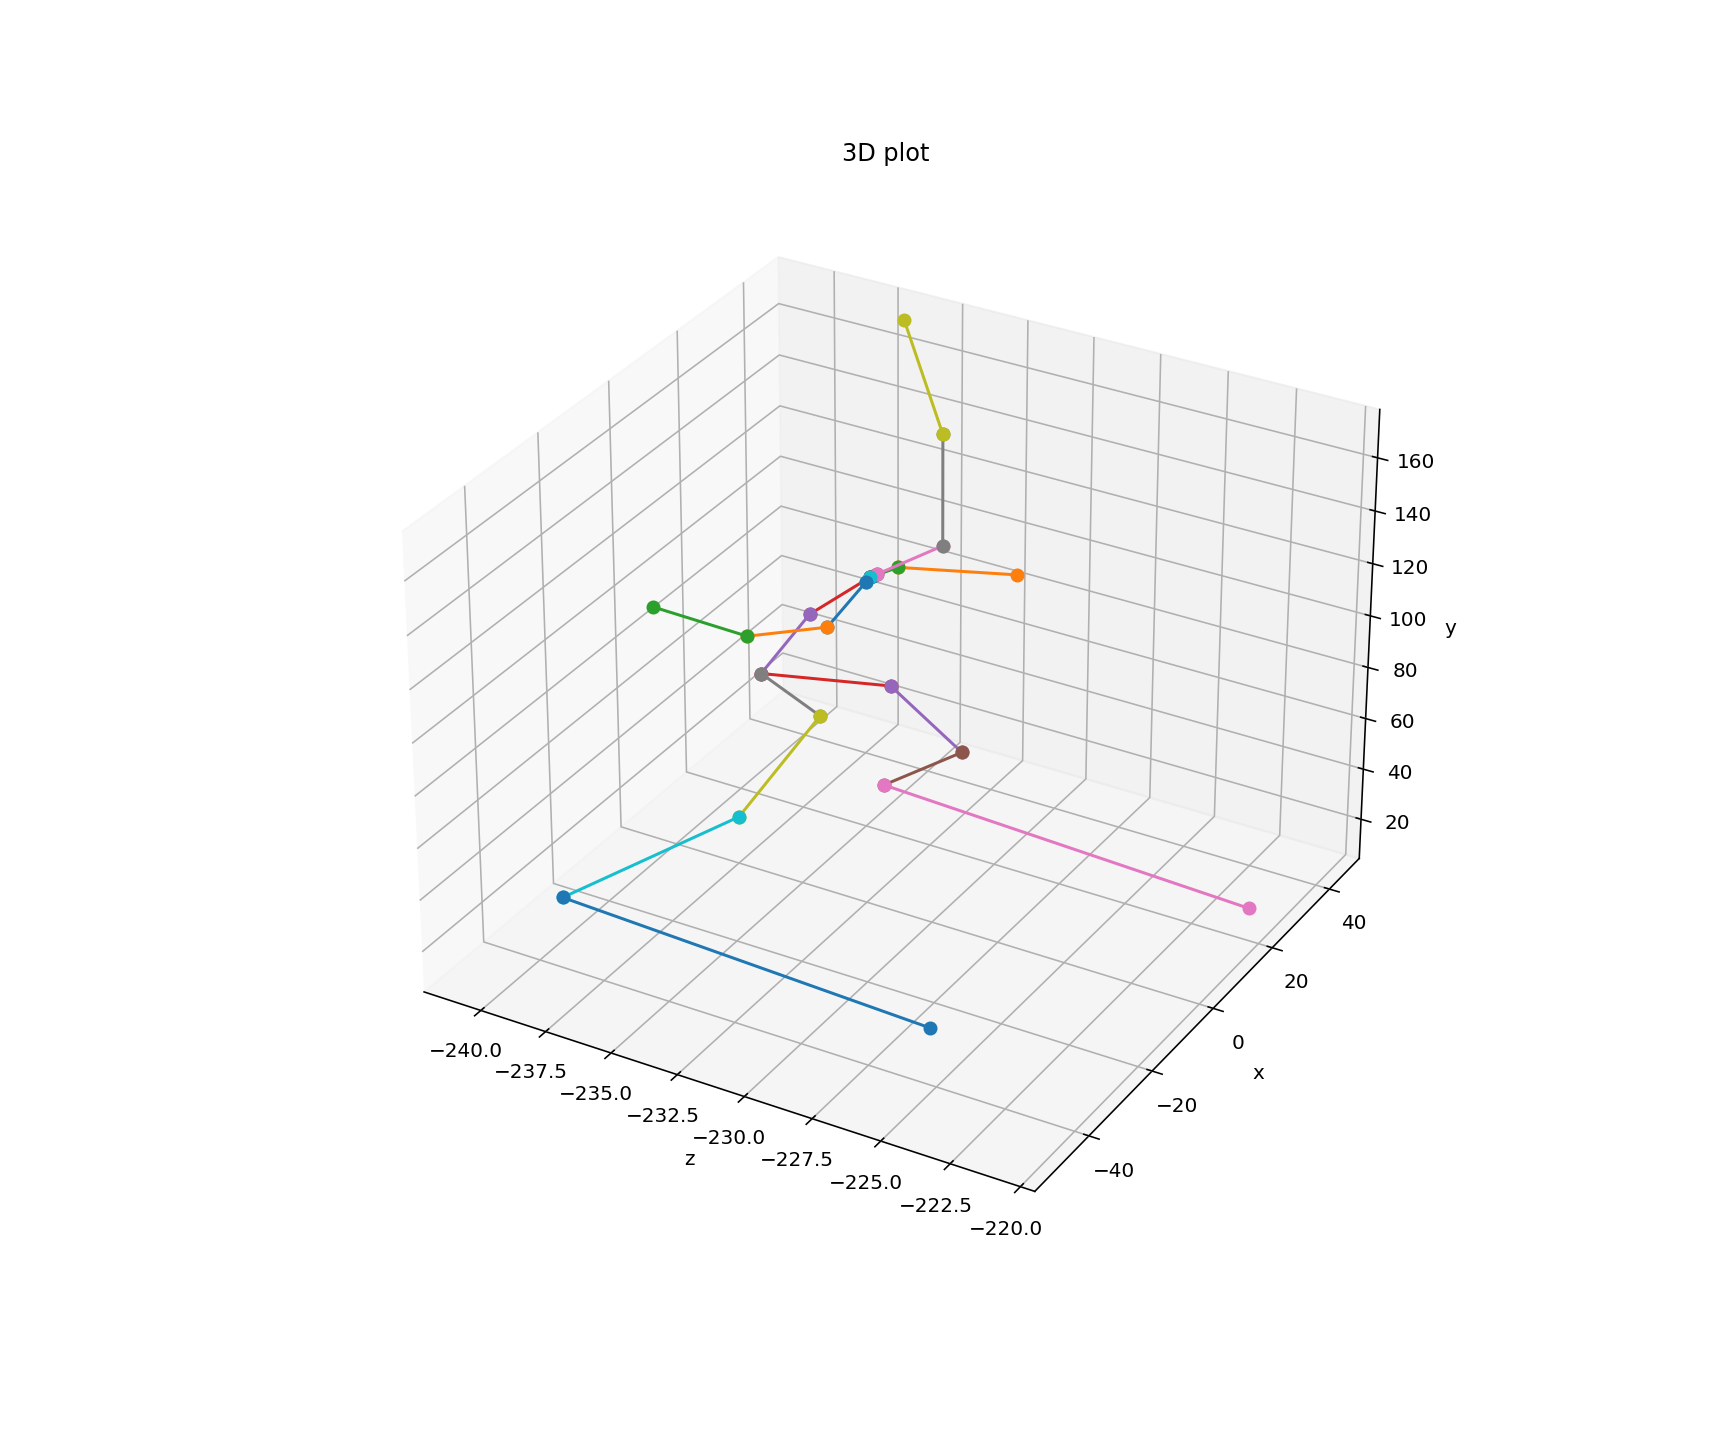

In [10]:
# Another 3d Visualization
%matplotlib notebook

plt.ion()
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection = '3d')

fig.show()
fig.canvas.draw()

for k in range(num_frames):
    ax.clear()
    
    ax.set_title('3D plot') 
    ax.set_xlabel('z')
    ax.set_ylabel('x')
    ax.set_zlabel('y')

    joint = skel[:, :, k]
    
    for j in range(J.shape[1]):
        p1 = joint[J[0,j],:]
        p2 = joint[J[1,j],:]
        ax.plot([p1[2], p2[2]], [p1[0], p2[0]], [p1[1], p2[1]], 'o-')

    fig.canvas.draw()